## Stock Price Prediction and Forecasting Using Stacked LSTM - Deep Learning

In [34]:
#importing libraries
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import yfinance as yf
%matplotlib inline
from keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [77]:
# Historical Carnival Cruise Stock Price:
# OHLCV using yfinance
# Load the stocks data
ccl = yf.download("CCL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
ccl.dropna(inplace=True)
#ccl.head()

[*********************100%***********************]  1 of 1 completed


In [3]:
# Historical Delta Airlines Stock Price:
# OHLCV using yfinance
# Load the stocks data
dal = yf.download("DAL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
dal.dropna(inplace=True)
#dal.head()

[*********************100%***********************]  1 of 1 completed


In [4]:
# Historical ETSY Stock Price:
# OHLCV using yfinance
# Load the stocks data
etsy = yf.download("ETSY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
etsy.dropna(inplace=True)
#etsy.head()

[*********************100%***********************]  1 of 1 completed


In [155]:
# Historical L Brands Stock Price:
# OHLCV using yfinance
# Load the stocks data
pp = yf.download("PYPL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
pp.dropna(inplace=True)
#PP.head()

[*********************100%***********************]  1 of 1 completed


In [6]:
# Historical SPY Stock Price:
# OHLCV using yfinance
# Load the stocks data
spy = yf.download("SPY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
spy.dropna(inplace=True)
spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,182.513626,222353500
2016-01-05,201.399994,201.899994,200.050003,201.360001,182.822327,110845800
2016-01-06,198.339996,200.059998,197.600006,198.820007,180.516174,152112600
2016-01-07,195.330002,197.440002,193.589996,194.050003,176.185333,213436100
2016-01-08,195.190002,195.850006,191.580002,191.919998,174.251419,209817200


In [40]:
#precovid_spy = spy['2016-01-01' :'2020-02-20']
#precovid_spy.tail()

In [8]:
#ccl_df = ccl[['Close']].copy()
#dal_df = dal[['Close']].copy()
#etsy_df = etsy[['Close']].copy()
#LB_df = LB[['Close']].copy()
#spy_df = spy[['Close']].copy()

In [9]:
#ccl_df.rename(columns = {'Close':'CCL'}, inplace = True) 
#dal_df.rename(columns = {'Close':'DAL'}, inplace = True) 
#etsy_df.rename(columns = {'Close':'ETSY'}, inplace = True) 
#LB_df.rename(columns = {'Close':'LB'}, inplace = True) 
#spy_df.rename(columns = {'Close':'SPY'}, inplace = True) 
#spy_df.head()

In [38]:
#dfs = [ccl_df, dal_df, etsy_df, LB_df,spy_df ]
#df = pd.concat(dfs,axis=1,join="outer",ignore_index=False)
#df.tail()

In [36]:
#precovid_df = df['2016-01-01' :'2020-02-20']
#precovid_df.tail()

In [39]:
precovid_spy = spy['2016-01-01' :'2020-02-20']
precovid_spy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,335.859985,338.119995,335.559998,337.059998,330.880859,54501900
2020-02-14,337.510010,337.730011,336.200012,337.600006,331.410980,64582200
2020-02-18,336.510010,337.670013,335.209991,336.730011,330.556915,57226200
2020-02-19,337.790009,339.079987,337.480011,338.339996,332.137360,48814700
2020-02-20,337.739990,338.640015,333.679993,336.950012,330.772919,74163400


In [13]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers  import Dense, LSTM
import matplotlib. pyplot as plt


Text(0, 0.5, 'SPY Close price in $')

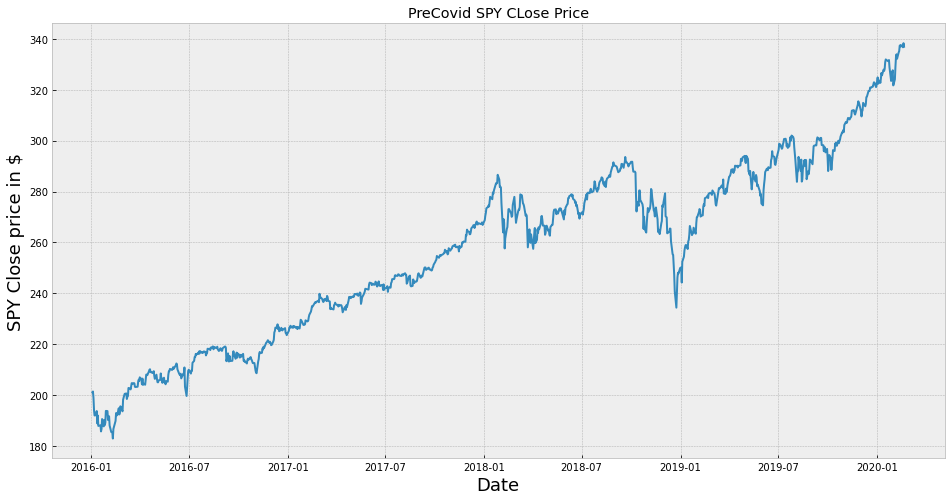

In [42]:
plt.figure(figsize=(16,8))
plt.title("PreCovid SPY CLose Price")
plt.plot(precovid_spy["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("SPY Close price in $", fontsize=18)

In [43]:
data = precovid_spy.filter(['Close'])
dataset = data.values
len(dataset)

1040

In [44]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.11679962],
       [0.11898637],
       [0.1026499 ],
       ...,
       [0.98964506],
       [1.        ],
       [0.99106005]])

In [46]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.11679962, 0.11898637, 0.1026499 , 0.07197069, 0.05827115,
       0.05949318, 0.06946233, 0.03839723, 0.05833543, 0.03183687,
       0.0334448 , 0.01794439, 0.02463341, 0.04926681, 0.0307435 ,
       0.04720862, 0.03389506, 0.0401981 , 0.06984822, 0.06939795,
       0.0469514 , 0.05428353, 0.05621305, 0.03273731, 0.01646512,
       0.01652941, 0.01550041, 0.        , 0.02424752, 0.04450732,
       0.06444562, 0.05936452, 0.05878569, 0.0766658 , 0.06084388,
       0.06650371, 0.08155385, 0.07865961, 0.06881912, 0.09808336,
       0.10380756, 0.10882428, 0.11300484, 0.11403394, 0.09994851,
       0.10625164, 0.10728064, 0.1279907 , 0.1263185 , 0.12419603,
       0.1317211 , 0.14001804, 0.13841012, 0.14027526, 0.13956777,
       0.13088504, 0.13030612, 0.13107799, 0.14316951, 0.14895809])]
[0.14574224520701984]
[array([0.11679962, 0.11898637, 0.1026499 , 0.07197069, 0.05827115,
       0.05949318, 0.06946233, 0.03839723, 0.05833543, 0.03183687,
       0.0334448 , 0.01794439, 0.024

In [47]:
y_train = np.asarray(y_train)

In [48]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model


In [49]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [51]:
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 3s 29ms/step - loss: 0.0181
Epoch 2/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0114
Epoch 3/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0155
Epoch 4/10
11/11 [==============================] - 0s 31ms/step - loss: 0.0053
Epoch 5/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0065
Epoch 6/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0012
Epoch 7/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0013
Epoch 8/10
11/11 [==============================] - 0s 29ms/step - loss: 7.4492e-04
Epoch 9/10
11/11 [==============================] - 0s 29ms/step - loss: 4.8035e-04
Epoch 10/10
11/11 [==============================] - 0s 29ms/step - loss: 4.6899e-04


In [52]:
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [53]:
x_test = np.array(x_test)

In [54]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [55]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [56]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.4670430696927586

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

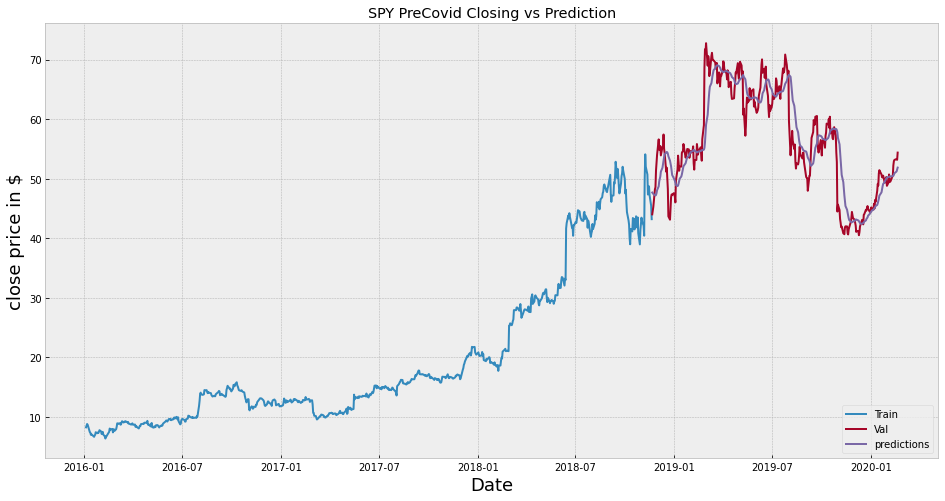

In [154]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('SPY PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [58]:
valid

,Close,predictions
Date,,
2018-11-21,265.019989,273.741699
2018-11-23,263.250000,273.089600
2018-11-26,267.500000,272.300079
2018-11-27,268.399994,271.615417
2018-11-28,274.579987,271.060974
...,...,...
2020-02-13,337.059998,325.137604
2020-02-14,337.600006,325.796387
2020-02-18,336.730011,326.462433


In [78]:
#slicing ccl_df to precovid times.
precovid_ccl = ccl['2016-01-01' :'2020-02-20']
precovid_ccl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,43.259998,43.599998,42.759998,43.200001,42.701618,6670600
2020-02-14,43.070000,43.119999,42.500000,42.599998,42.108536,3998000
2020-02-18,42.599998,42.970001,42.529999,42.919998,42.424847,6245300
2020-02-19,42.560001,43.439999,42.529999,43.340000,42.840000,4625400
2020-02-20,42.619999,42.860001,42.189999,42.500000,42.500000,5343800


Text(0, 0.5, 'CCL Close price in $')

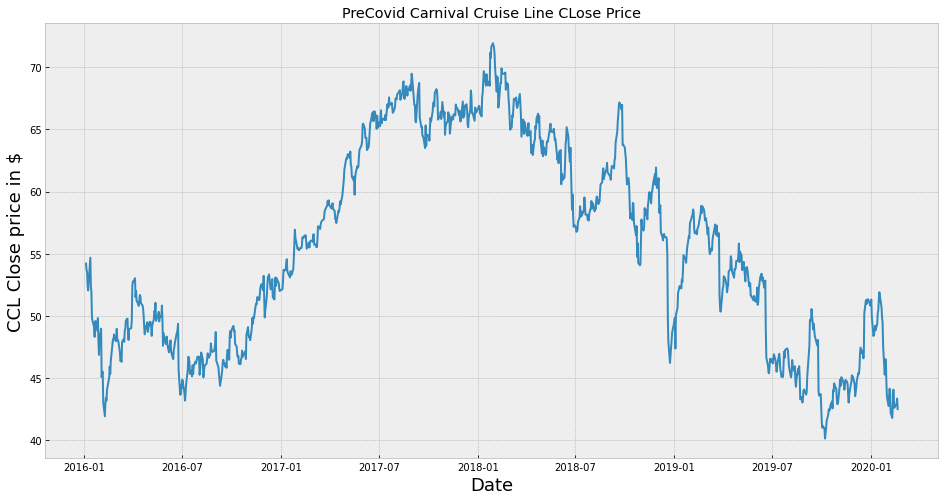

In [79]:
plt.figure(figsize=(16,8))
plt.title("PreCovid Carnival Cruise Line CLose Price")
plt.plot(precovid_ccl["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [220]:
data = precovid_ccl.filter(['Close'])
dataset = data.values
len(dataset)

1040

In [221]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [222]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.44231371],
       [0.42596663],
       [0.42093677],
       ...,
       [0.08770817],
       [0.10091163],
       [0.07450484]])

In [223]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.44231371, 0.42596663, 0.42093677, 0.38541332, 0.37472486,
       0.43414011, 0.45740329, 0.38509901, 0.3712668 , 0.30493557,
       0.28104364, 0.25715184, 0.29676197, 0.29676197, 0.27255573,
       0.30462113, 0.24897824, 0.21156867, 0.25149323, 0.27790002,
       0.15561146, 0.16535675, 0.16912911, 0.09148066, 0.05627152,
       0.0892801 , 0.10311219, 0.09619608, 0.12354606, 0.15372522,
       0.18201813, 0.16378494, 0.1967934 , 0.23891852, 0.25055005,
       0.24834949, 0.26343907, 0.2580949 , 0.24614894, 0.27758559,
       0.25243629, 0.24897824, 0.24646337, 0.21754159, 0.19585034,
       0.19930839, 0.1939641 , 0.24457713, 0.2511788 , 0.24457713,
       0.27349891, 0.27790002, 0.29864821, 0.30336364, 0.27098392,
       0.24929267, 0.2763281 , 0.27947183, 0.29896252, 0.38478458])]
[0.3973592846261711]
[array([0.44231371, 0.42596663, 0.42093677, 0.38541332, 0.37472486,
       0.43414011, 0.45740329, 0.38509901, 0.3712668 , 0.30493557,
       0.28104364, 0.25715184, 0.2967

In [224]:
y_train = np.asarray(y_train)

In [225]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model

In [226]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [227]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [228]:
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 7s 31ms/step - loss: 0.0730
Epoch 2/10
11/11 [==============================] - 0s 31ms/step - loss: 0.0237
Epoch 3/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0064
Epoch 4/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0080
Epoch 5/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0049
Epoch 6/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0035
Epoch 7/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0028
Epoch 8/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0025
Epoch 9/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0023
Epoch 10/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0022


In [229]:
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [230]:
x_test = np.array(x_test)

In [231]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [232]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [233]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7686202587225498

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

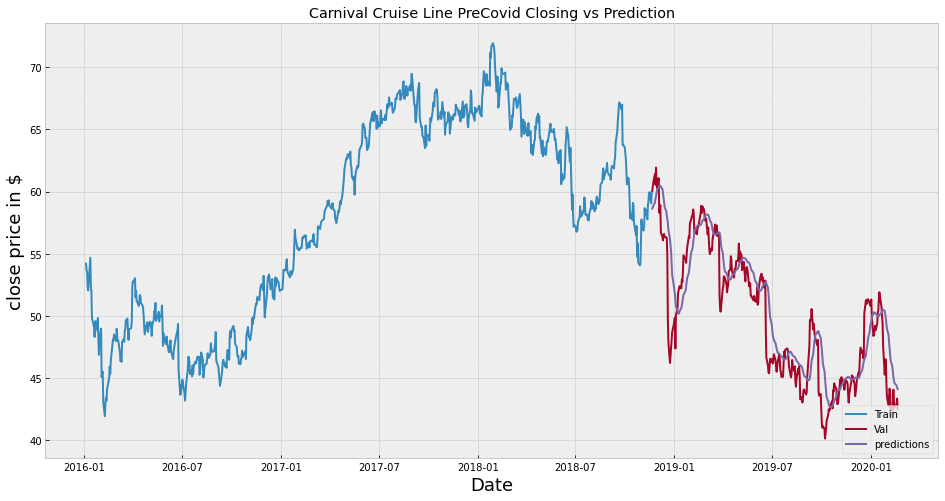

In [234]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Carnival Cruise Line PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [111]:
valid

,Close,predictions
Date,,
2018-11-21,60.040001,59.370857
2018-11-23,60.750000,59.593182
2018-11-26,61.400002,59.834560
2018-11-27,60.549999,60.105495
2018-11-28,61.939999,60.349930
...,...,...
2020-02-13,43.200001,45.407318
2020-02-14,42.599998,45.141552
2020-02-18,42.919998,44.890717


In [112]:
#slicing dal_df to precovid times.
precovid_dal = dal['2016-01-01' :'2020-02-20']
precovid_dal.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,58.750000,59.209999,58.349998,59.130001,58.724190,4353100
2020-02-14,59.240002,59.470001,58.580002,58.900002,58.495766,3810100
2020-02-18,58.869999,59.470001,58.410000,58.720001,58.317001,5690600
2020-02-19,58.490002,58.580002,58.029999,58.509998,58.509998,4399900
2020-02-20,58.200001,58.990002,58.119999,58.380001,58.380001,5239400


Text(0, 0.5, 'CCL Close price in $')

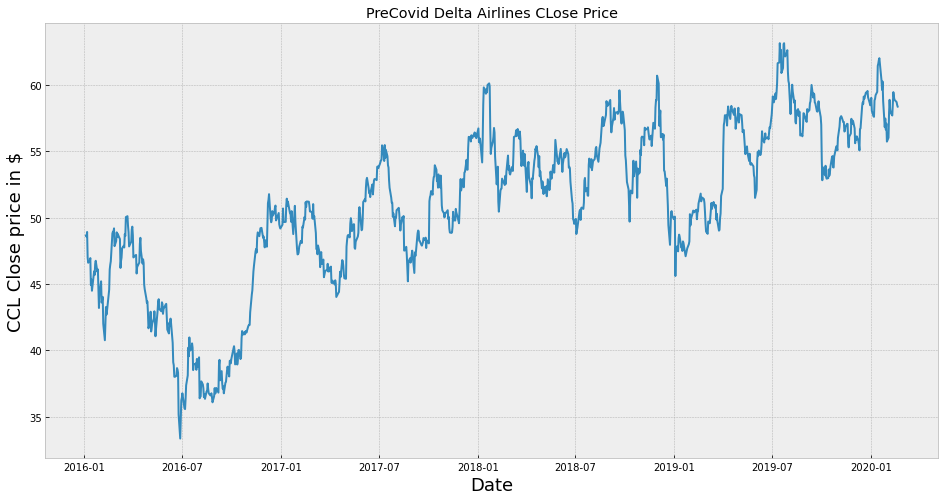

In [114]:
plt.figure(figsize=(16,8))
plt.title("PreCovid Delta Airlines CLose Price")
plt.plot(precovid_dal["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [235]:
data = precovid_dal.filter(['Close'])
dataset = data.values
len(dataset)

1040

In [236]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [237]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.51342281],
       [0.51040267],
       [0.52248322],
       ...,
       [0.85100675],
       [0.84395968],
       [0.83959735]])

In [238]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.51342281, 0.51040267, 0.52248322, 0.45771811, 0.44463088,
       0.44899334, 0.4563758 , 0.38859055, 0.40201342, 0.37382549,
       0.42281875, 0.41375833, 0.44161074, 0.44966436, 0.4221476 ,
       0.42785236, 0.38120808, 0.33020136, 0.36677854, 0.39765097,
       0.34395974, 0.35033553, 0.35838928, 0.29026839, 0.24865772,
       0.28926172, 0.33255034, 0.31342283, 0.32315441, 0.37651012,
       0.42751672, 0.43959728, 0.44832218, 0.51879193, 0.52315438,
       0.52281874, 0.53154364, 0.48657719, 0.49932891, 0.52147655,
       0.50973151, 0.51778526, 0.51375832, 0.50436239, 0.43154366,
       0.44899334, 0.45771811, 0.48087243, 0.48758386, 0.48322141,
       0.5171141 , 0.51208049, 0.56006708, 0.56241607, 0.53791944,
       0.52181207, 0.48590604, 0.4979866 , 0.52919466, 0.53590609])]
[0.5140939626525767]
[array([0.51342281, 0.51040267, 0.52248322, 0.45771811, 0.44463088,
       0.44899334, 0.4563758 , 0.38859055, 0.40201342, 0.37382549,
       0.42281875, 0.41375833, 0.4416

In [239]:
y_train = np.asarray(y_train)

In [240]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model

In [241]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [242]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [243]:
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 2s 30ms/step - loss: 0.0944
Epoch 2/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0421
Epoch 3/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0067
Epoch 4/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0132
Epoch 5/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0070
Epoch 6/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0068
Epoch 7/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0048
Epoch 8/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0041
Epoch 9/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0037
Epoch 10/10
11/11 [==============================] - 0s 31ms/step - loss: 0.0035


In [244]:
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [245]:
x_test = np.array(x_test)

In [246]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [247]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [248]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.07783117049779648

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

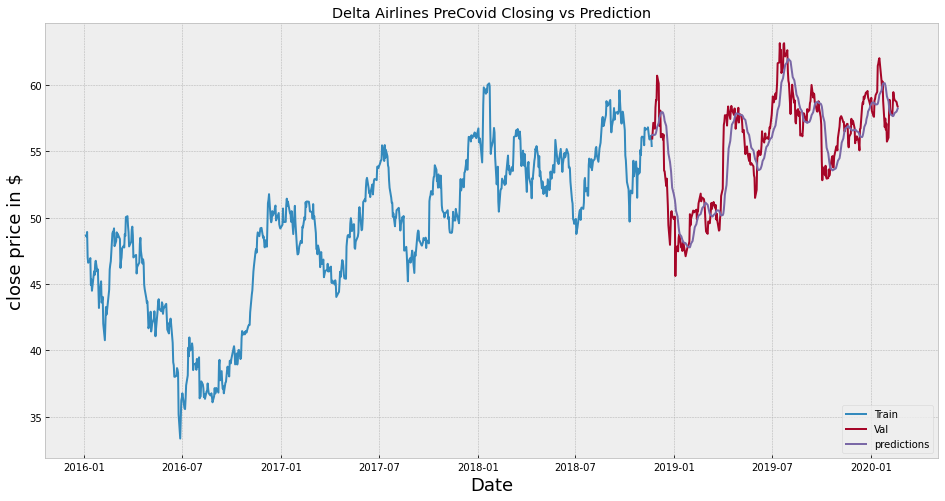

In [249]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Delta Airlines PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [130]:
valid

,Close,predictions
Date,,
2018-11-21,55.970001,56.532688
2018-11-23,57.160000,56.526253
2018-11-26,56.709999,56.566730
2018-11-27,58.310001,56.614258
2018-11-28,58.869999,56.740944
...,...,...
2020-02-13,59.130001,58.249382
2020-02-14,58.900002,58.360058
2020-02-18,58.720001,58.474991


In [265]:
#slicing etsy_df to precovid times.
precovid_etsy = etsy['2016-01-01' :'2020-02-20']
precovid_etsy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,51.790001,53.139999,51.500000,52.970001,52.970001,2131900
2020-02-14,53.389999,53.540001,52.200001,53.160000,53.160000,2065900
2020-02-18,53.020000,53.799999,52.650002,53.320000,53.320000,1819500
2020-02-19,53.790001,54.250000,52.900002,53.180000,53.180000,2700500
2020-02-20,53.369999,55.474998,53.180000,54.389999,54.389999,3451000


Text(0, 0.5, 'CCL Close price in $')

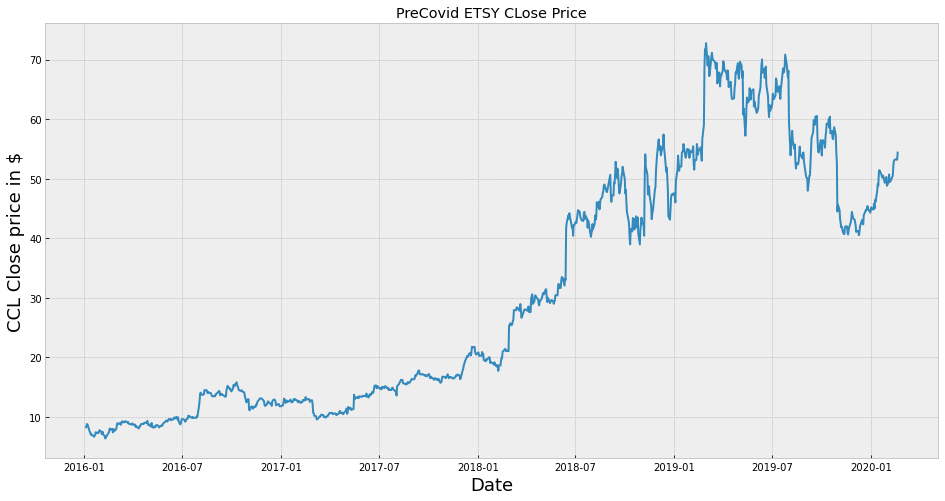

In [266]:
plt.figure(figsize=(16,8))
plt.title("PreCovid ETSY CLose Price")
plt.plot(precovid_etsy["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [267]:
data = precovid_etsy.filter(['Close'])
dataset = data.values
len(dataset)

1040

In [268]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [269]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02830899],
       [0.03237465],
       [0.03674146],
       ...,
       [0.70712245],
       [0.70501434],
       [0.72323448]])

In [270]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.02830899, 0.03237465, 0.03674146, 0.03478392, 0.03041711,
       0.01626261, 0.01490739, 0.00948652, 0.01069116, 0.0096371 ,
       0.00436681, 0.00783015, 0.00948652, 0.01596145, 0.01340159,
       0.01535913, 0.0141545 , 0.01701551, 0.02108117, 0.01791899,
       0.01144406, 0.01445566, 0.01686493, 0.01008884, 0.00542087,
       0.        , 0.00542087, 0.00557145, 0.00813131, 0.01701551,
       0.02529739, 0.02168348, 0.02364101, 0.02394217, 0.01550971,
       0.02318928, 0.02318928, 0.01942479, 0.0237916 , 0.03011594,
       0.03854841, 0.03809668, 0.03704261, 0.03884956, 0.0349345 ,
       0.03583797, 0.04065653, 0.04381871, 0.04050595, 0.04231291,
       0.04216232, 0.04381871, 0.04321638, 0.04065653, 0.04201174,
       0.03779551, 0.03749436, 0.03523565, 0.03598856, 0.03839783])]
[0.03523565424994657]
[array([0.02830899, 0.03237465, 0.03674146, 0.03478392, 0.03041711,
       0.01626261, 0.01490739, 0.00948652, 0.01069116, 0.0096371 ,
       0.00436681, 0.00783015, 0.009

In [271]:
y_train = np.asarray(y_train)

In [272]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model

In [273]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [274]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [275]:
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 3s 30ms/step - loss: 0.0023
Epoch 2/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0150
Epoch 3/10
11/11 [==============================] - 0s 31ms/step - loss: 0.0034
Epoch 4/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0117
Epoch 5/10
11/11 [==============================] - 0s 31ms/step - loss: 6.0075e-04
Epoch 6/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0063
Epoch 7/10
11/11 [==============================] - 0s 33ms/step - loss: 5.2438e-04
Epoch 8/10
11/11 [==============================] - 0s 30ms/step - loss: 3.6085e-04
Epoch 9/10
11/11 [==============================] - 0s 30ms/step - loss: 5.3565e-04
Epoch 10/10
11/11 [==============================] - 0s 30ms/step - loss: 8.0009e-04


In [276]:
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [277]:
x_test = np.array(x_test)

In [278]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [279]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [280]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.9468103188734788

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

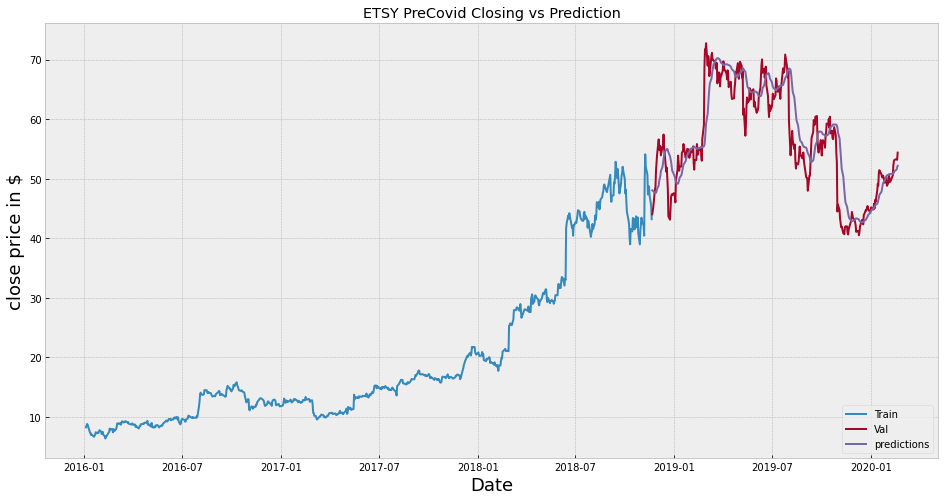

In [281]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('ETSY PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [151]:
valid

,Close,predictions
Date,,
2018-11-21,44.020000,47.685127
2018-11-23,45.270000,47.445095
2018-11-26,48.230000,47.226562
2018-11-27,48.580002,47.189014
2018-11-28,51.380001,47.274780
...,...,...
2020-02-13,52.970001,50.671227
2020-02-14,53.160000,50.925159
2020-02-18,53.320000,51.228500


In [282]:
precovid_pp = pp['2016-01-01' :'2020-02-20']
precovid_pp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-13,118.040001,121.099998,117.800003,120.510002,120.510002,6066300
2020-02-14,120.889999,123.000000,120.800003,122.989998,122.989998,5769900
2020-02-18,122.580002,122.989998,121.680000,122.269997,122.269997,5085700
2020-02-19,122.629997,124.449997,122.300003,123.910004,123.910004,4878600
2020-02-20,123.860001,124.309998,120.400002,122.430000,122.430000,7212900


Text(0, 0.5, 'CCL Close price in $')

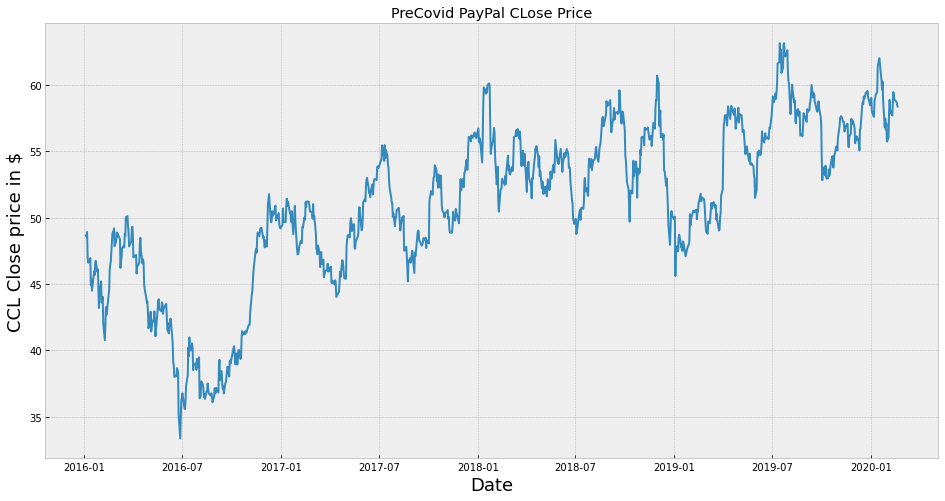

In [283]:
plt.figure(figsize=(16,8))
plt.title("PreCovid PayPal CLose Price")
plt.plot(precovid_dal["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CCL Close price in $", fontsize=18)

In [284]:
data = precovid_pp.filter(['Close'])
dataset = data.values
len(dataset)

1040

In [285]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [286]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

728

In [287]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03829144],
       [0.03354547],
       [0.02998596],
       ...,
       [0.98231036],
       [1.        ],
       [0.98403621]])

In [288]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.03829144, 0.03354547, 0.02998596, 0.02081761, 0.0160716 ,
       0.01984684, 0.0202783 , 0.0099234 , 0.01801314, 0.01197282,
       0.01078632, 0.        , 0.        , 0.0052853 , 0.00291229,
       0.00830545, 0.00420666, 0.03279043, 0.05328442, 0.06342359,
       0.06072701, 0.06266851, 0.06439432, 0.04174306, 0.02599504,
       0.01617948, 0.01833676, 0.02502427, 0.03343758, 0.04594972,
       0.05565742, 0.05511812, 0.0491856 , 0.05177434, 0.04616545,
       0.05684393, 0.05975624, 0.06784598, 0.07485706, 0.08682989,
       0.08585912, 0.08434904, 0.08456477, 0.08391758, 0.0750728 ,
       0.07949519, 0.0786323 , 0.08941862, 0.08823212, 0.08704562,
       0.09319382, 0.09416459, 0.0885557 , 0.10721603, 0.10915757,
       0.10052852, 0.08327038, 0.08132888, 0.08985005, 0.08456477])]
[0.07981876259058879]
[array([0.03829144, 0.03354547, 0.02998596, 0.02081761, 0.0160716 ,
       0.01984684, 0.0202783 , 0.0099234 , 0.01801314, 0.01197282,
       0.01078632, 0.        , 0.   

In [289]:
y_train = np.asarray(y_train)

In [290]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(668, 60, 1)

### Building Compiling training and testing the LSTM model

In [291]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [292]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [293]:
model.fit(x_train, y_train, batch_size=64, epochs=10, shuffle = False)

Epoch 1/10
11/11 [==============================] - 3s 31ms/step - loss: 0.0016
Epoch 2/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0075
Epoch 3/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0046
Epoch 4/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0023
Epoch 5/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0016
Epoch 6/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0041
Epoch 7/10
11/11 [==============================] - 0s 30ms/step - loss: 9.9853e-04
Epoch 8/10
11/11 [==============================] - 0s 30ms/step - loss: 3.6085e-04
Epoch 9/10
11/11 [==============================] - 0s 30ms/step - loss: 3.5582e-04
Epoch 10/10
11/11 [==============================] - 0s 30ms/step - loss: 3.1757e-04


In [294]:
test_data = scaled_data[training_data_size - 60: , :]
x_test = []
y_test = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [295]:
x_test = np.array(x_test)

In [296]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [297]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [298]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.2991991287622695

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(close=None, block=None)>

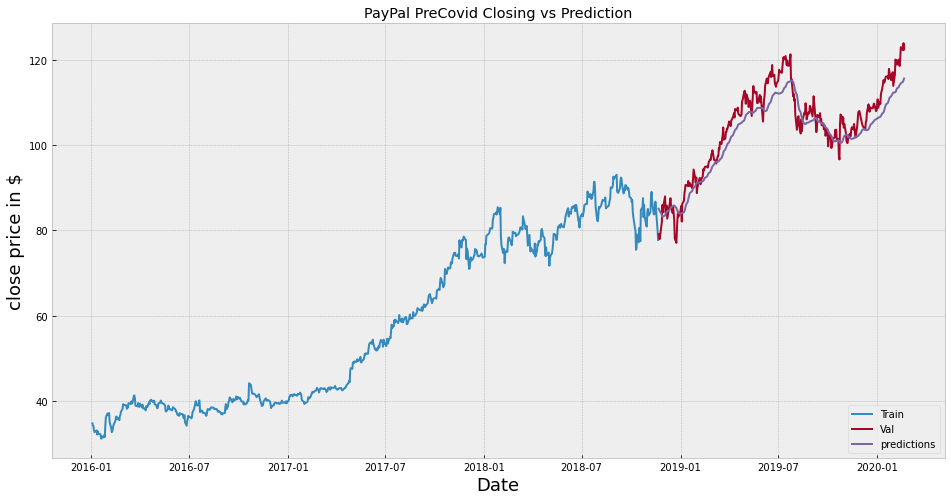

In [299]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('PayPal PreCovid Closing vs Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [175]:
valid

,Close,predictions
Date,,
2018-11-21,79.120003,82.279129
2018-11-23,77.949997,81.798187
2018-11-26,80.860001,81.237091
2018-11-27,81.970001,80.779747
2018-11-28,85.980003,80.449188
...,...,...
2020-02-13,120.510002,109.019218
2020-02-14,122.989998,109.216515
2020-02-18,122.269997,109.519325
